# Pràctica 3: Regressió Logistica


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent dijous abans de les 23:59, és a dir, tindreu les hores de classe més tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta práctica será molt més dirigida que l'anterior. S'evaluarán els següents conceptes sobre una mateixa base de dades, que tractarà sobre els vins:

* A. Ús LogisticRegression (20%)
* B. Regularitzadors (40%)
* C. Demostració Error de Variance (20%)
* D. Demostració Error de Bias (20%)

A continuació veurem un exemple de regressió lineal, i com es comporta el regressor logistic.

(-3, 3)

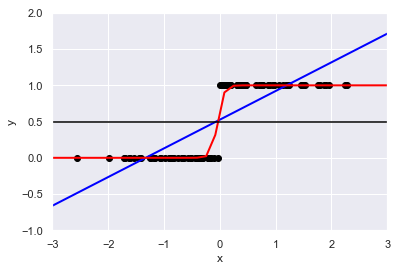

In [4]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline



 

def lr_model(x):
    return 1 / (1 + np.exp(-x))

xmin, xmax = -10, 10
np.random.seed(0)
X = np.random.normal(size = 100) 

y = (X > 0).astype(np.float) 
X = X[:, np.newaxis] 
X_test = np.linspace(-4, 4, 50)

# Linear Regression:
ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, color = 'blue', linewidth = 2)

# Logistic Regression:
clf = linear_model.LogisticRegression(C=1e2)
clf.fit(X, y)
loss = lr_model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color = 'red', linewidth = 2)


plt.axhline(0.5, color = 'black')
plt.scatter(X, y, color = 'black')

plt.ylabel('y')
plt.xlabel('x')

plt.ylim(-1, 2)
plt.xlim(-3, 3)


Per cert, recordeu el què significa el error de Variança i el de bias.

<img src="bias_variance.png" width=600 height=600 />

In [5]:
# Codi esquelet per la pràctica de la 3 sessió: Regressió Logistica

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()


# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('winequalityN.csv')
dataset = dataset.dropna()
dataset['is_red_wine'] = (dataset["type"] == 'red').astype(int)


print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (6463, 14)


A continuació veurem algunes taules i gràfiques per entendre com són les dades que tenim:

In [6]:
display(dataset)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red_wine
0,white,7.000,0.270,0.360,20.700,0.045,45.000,170.000,1.001,3.000,0.450,8.800,6,0
1,white,6.300,0.300,0.340,1.600,0.049,14.000,132.000,0.994,3.300,0.490,9.500,6,0
2,white,8.100,0.280,0.400,6.900,0.050,30.000,97.000,0.995,3.260,0.440,10.100,6,0
3,white,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6,0
4,white,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6,0
5,white,8.100,0.280,0.400,6.900,0.050,30.000,97.000,0.995,3.260,0.440,10.100,6,0
6,white,6.200,0.320,0.160,7.000,0.045,30.000,136.000,0.995,3.180,0.470,9.600,6,0
7,white,7.000,0.270,0.360,20.700,0.045,45.000,170.000,1.001,3.000,0.450,8.800,6,0
8,white,6.300,0.300,0.340,1.600,0.049,14.000,132.000,0.994,3.300,0.490,9.500,6,0
9,white,8.100,0.220,0.430,1.500,0.044,28.000,129.000,0.994,3.220,0.450,11.000,6,0


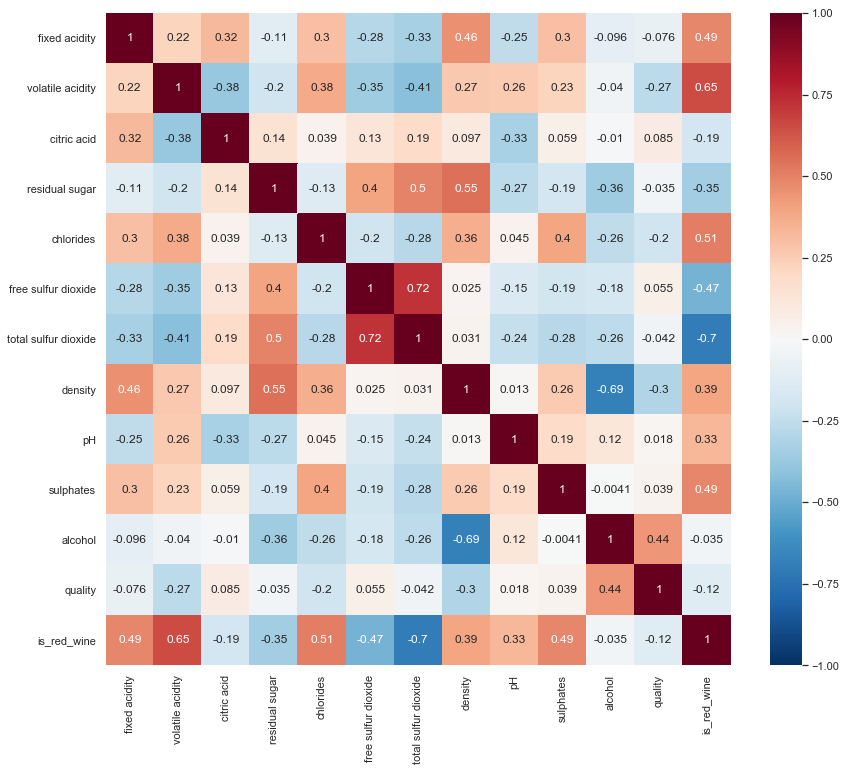

In [7]:
correlation = dataset.corr()
#display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

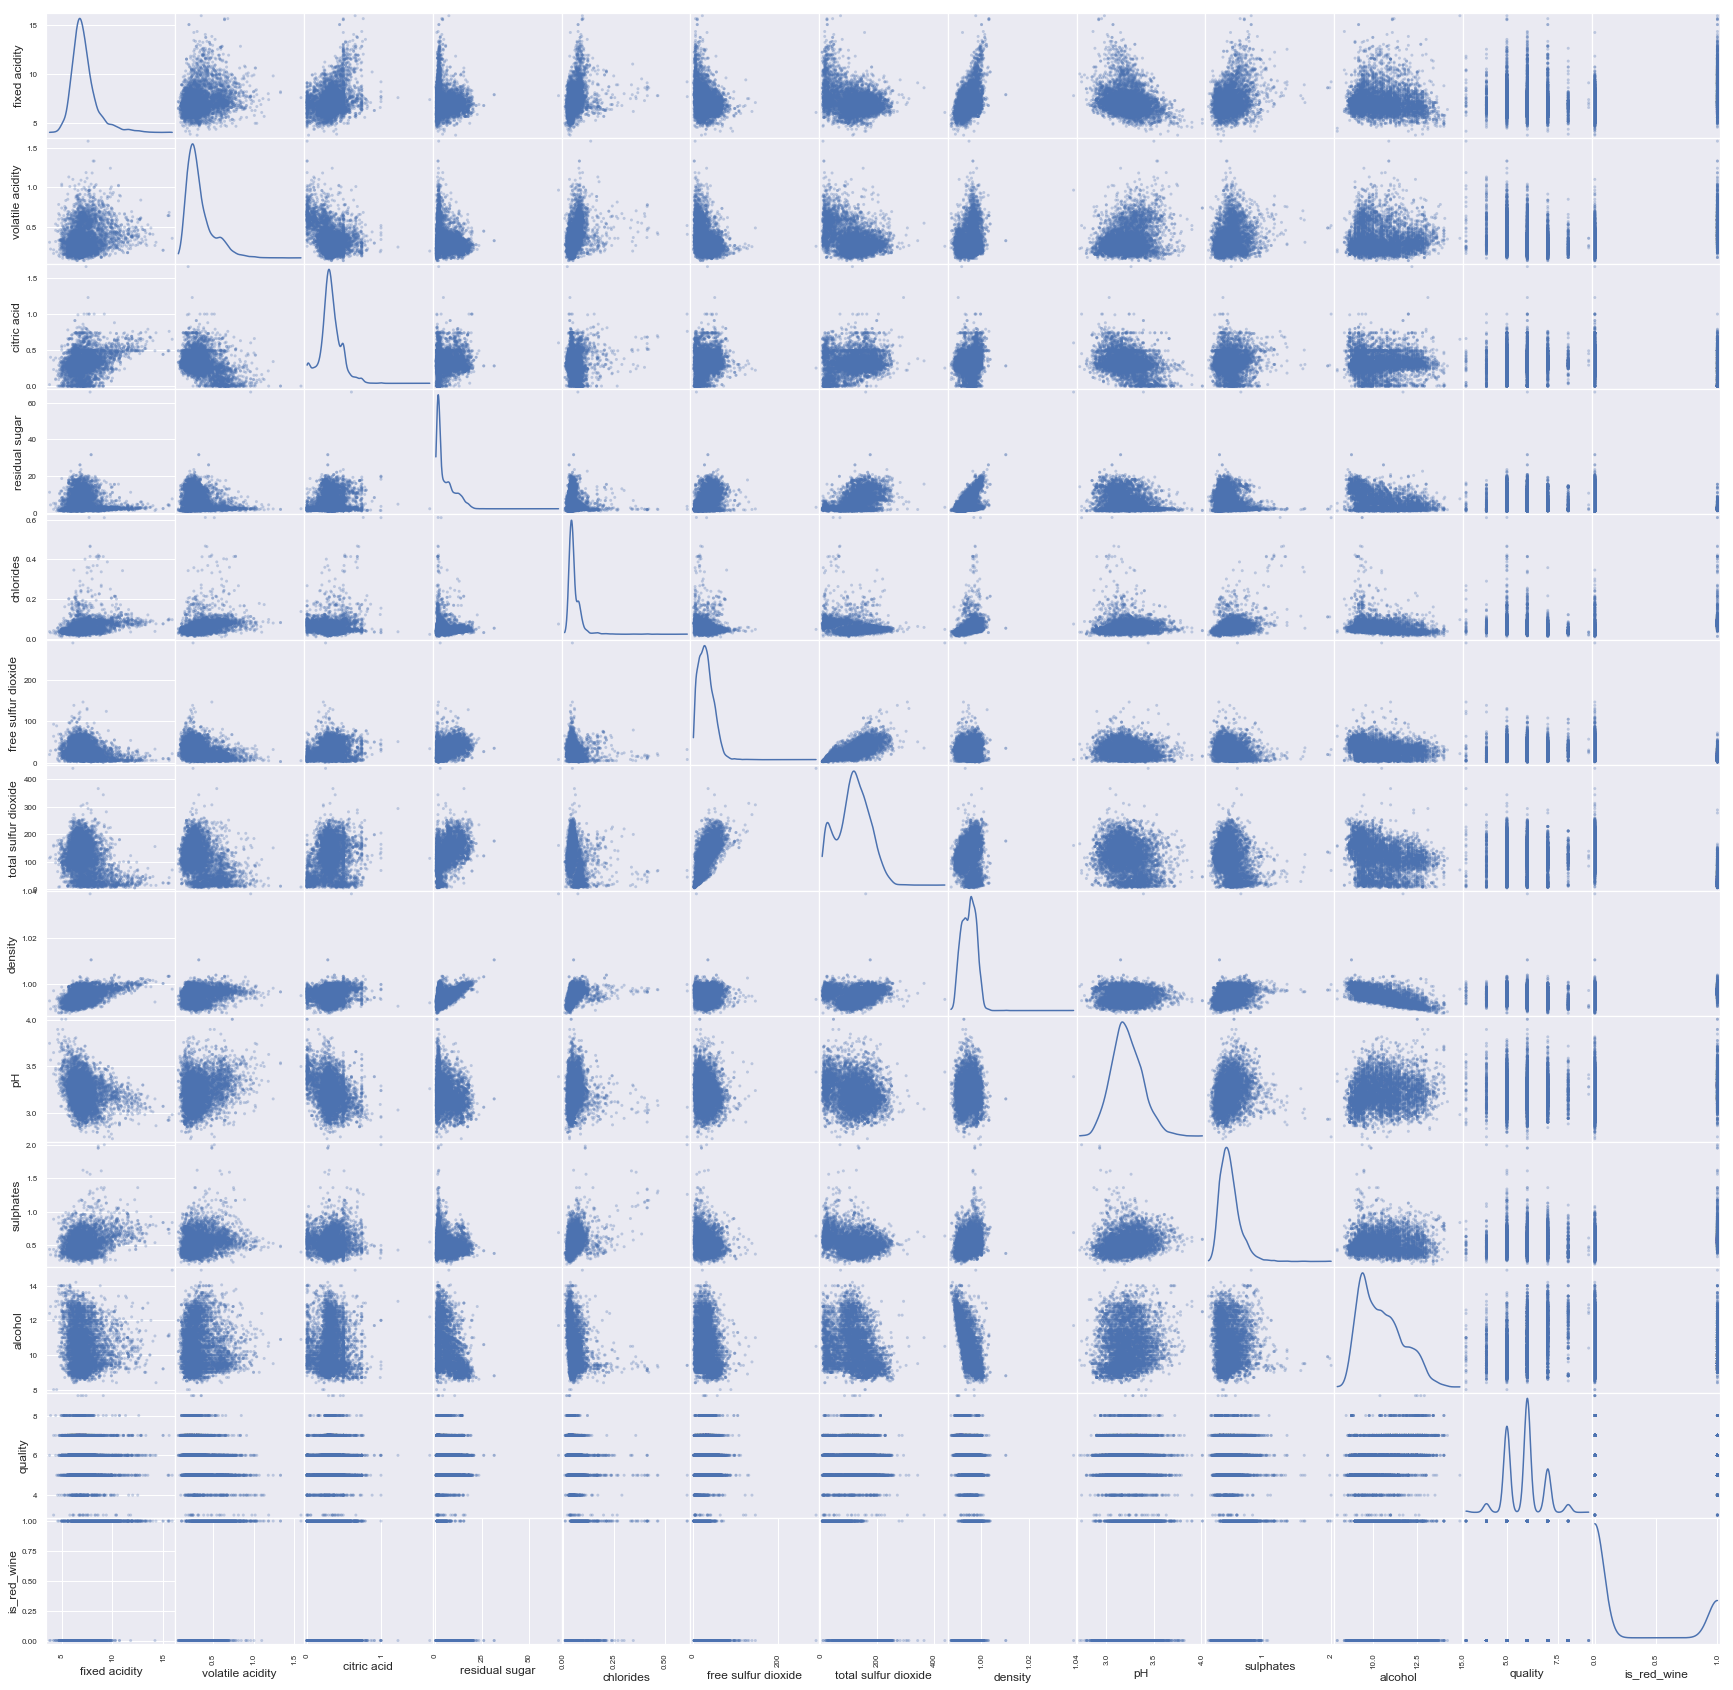

In [8]:
pd.plotting.scatter_matrix(dataset, alpha = 0.3, figsize = (30,30), diagonal = 'kde');

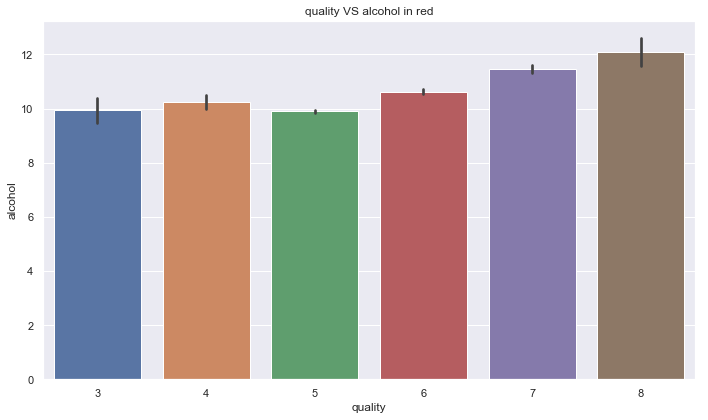

<Figure size 432x288 with 0 Axes>

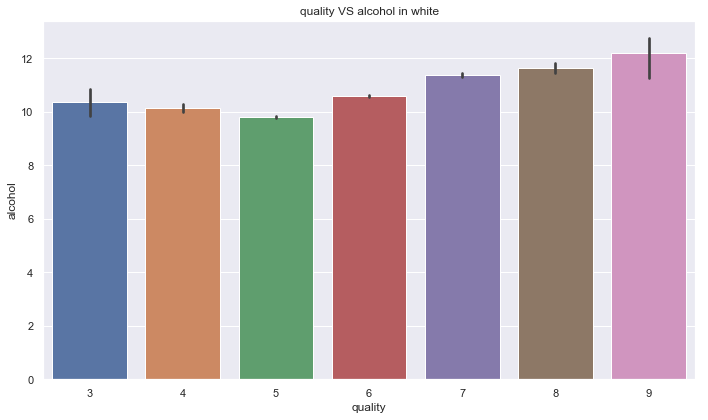

<Figure size 432x288 with 0 Axes>

In [9]:
#We can visualize relationships of discreet values better with a bar plot

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=dataset[dataset.type=="red"], ax=axs)
plt.title('quality VS alcohol in red')

plt.tight_layout()
plt.show()
plt.gcf().clear()

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=dataset[dataset.type=="white"], ax=axs)
plt.title('quality VS alcohol in white')

plt.tight_layout()
plt.show()
plt.gcf().clear()


Abans de començar amb els exercicis, preparaem les dades per a que sigui una classificació binaria

In [10]:
np.max(dataset.quality)

9

In [11]:
#Defining the splits for categories. 1-5 will be poor quality, 6-10 will be great
bins = [1,5,10]

#0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1]
dataset['quality_categorical'] = pd.cut(dataset['quality'], bins=bins, labels=quality_labels, include_lowest=True)
# Split the data into features and target label
quality_raw = dataset['quality_categorical']
features_raww = dataset.drop(['type', 'quality', 'quality_categorical'], axis = 1)

features_raw = StandardScaler().fit_transform(features_raww)


In [12]:
features_raw

array([[-0.16778609, -0.42270958,  0.2839587 , ..., -0.5449872 ,
        -1.41892232, -0.5719307 ],
       [-0.70715516, -0.2404789 ,  0.14625658, ..., -0.27635393,
        -0.83218392, -0.5719307 ],
       [ 0.67979387, -0.36196602,  0.55936296, ..., -0.61214551,
        -0.32926528, -0.5719307 ],
       ...,
       [-0.70715516,  1.03513588, -1.29961576, ...,  1.46976231,
         0.42511267,  1.74846359],
       [-1.01536606,  1.85517396, -1.36846682, ...,  1.20112905,
        -0.24544551,  1.74846359],
       [-0.93831333, -0.17973534,  1.0413204 , ...,  0.86533746,
         0.42511267,  1.74846359]])

In [13]:
quality_raw.dtypes

CategoricalDtype(categories=[0, 1], ordered=True)

In [14]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples. {:.1f}% is positive".format(X_train.shape[0], 100*sum(y_train)/y_train.shape[0]))
print("Testing set has {} samples. {:.1f}% is positive".format(X_test.shape[0], 100*sum(y_test)/y_test.shape[0]))

display(X_test)

Training set has 5170 samples. 63.1% is positive
Testing set has 1293 samples. 64.3% is positive


array([[ 0.06337208, -0.5441967 , -0.40455193, ..., -1.08225373,
        -1.08364323, -0.5719307 ],
       [-1.16947151, -0.78717095,  0.35280977, ...,  0.59670419,
         0.08983358, -0.5719307 ],
       [ 0.1404248 ,  0.12398247,  0.07740551, ..., -1.350887  ,
         0.59275221, -0.5719307 ],
       ...,
       [-0.63010244,  1.39959725, -2.05697745, ...,  0.99965409,
        -0.83218392,  1.74846359],
       [-0.01368064, -0.96940163, -0.06029661, ..., -0.88077878,
         0.25747312, -0.5719307 ],
       [-0.93831333,  0.42770027, -0.74880725, ..., -0.07487898,
         0.00601381, -0.5719307 ]])

## A. Ús LogisticRegression (20%)

En aquesta secció us demanem que apliqueu de sklearn el model de [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html):

Si feu proves amb diferents parametres, guardeu els resultats que obtingueu en una taula de pandas i els mostreu.

* Guarda resultats de temps, de precisió, de accuracy, tant de train com de test


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score
import time


def entrena_prediu_evalua(model, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - model: el objecte que s'entrenarà
       - sample_size: el número de mostres del training set que es farán servir (en %)
       - X_train: caracteristiques entrenament
       - y_train: etiqueta entrenament
       - X_test: caracteristiques test
       - y_test: etiqueta test
    '''
    start = time.time()
    results = {}

    """
    Entrenar el model tenint en compte el 'sample_size' 
    """
    size = int(sample_size * X_train.shape[0])
    Xs_train = X_train[:size]
    ys_train = y_train[:size]
    model.fit(Xs_train, ys_train)

    """
    Obtenir les prediccions del model sobre el conjunt d'entrenament i sobre el conjunt de test
    """
    y_predict_train = model.predict(X_train)
    y_predict_test = model.predict(X_test)
    
    """
    Calcular el accuracy i el F1-score del train i del test
    """
    results['time'] = time.time()-start
    results['acc_train'] = accuracy_score(y_train, y_predict_train) 
        # == model.score(X_train, y_train) == f1_score(y_train, y_predict_train, average='micro')
    results['acc_test'] = accuracy_score(y_test, y_predict_test)
    results['pr_train'] = precision_score(y_train, y_predict_train) 
    results['pr_test'] = precision_score(y_test, y_predict_test)
    results['F1_train_macro'] = f1_score(y_train, y_predict_train, average='macro')
    results['F1_test_macro'] = f1_score(y_test, y_predict_test, average='macro')
    #results['F1_train_none'] = f1_score(y_train, y_predict_train, average=None)
    #results['F1_test_none'] = f1_score(y_test, y_predict_test, average=None)
    results['coef_'] = model.coef_[0]
    results['intercept_'] = model.intercept_[0]
    results['bias'] = (results['acc_train'] + results['acc_test'])/2
    results['var'] = results['acc_train'] - results['acc_test']

    #print("{} s'ha entrenat amb el {}% de mostres.".format(model.__class__.__name__, sample_size * 100))
    
    return results


In [151]:
clf = LogisticRegression(random_state = 0)# model
samples = 0.1  # utilitza valors com 0.01, 0.1 o 1, que hauran de equivaldre a 1%, 10%, 100%
results = entrena_prediu_evalua(clf, samples, X_train, y_train, X_test, y_test)

print( results['var'], results['bias'])


0.0064707897457070285 0.730226887525599


In [139]:
rows_list = []
for i in range(1,101):
    """Variem paràmetres C i l1_ratio segons i/100 i guardem tots els resultats"""
    clf = LogisticRegression(random_state = 0,penalty = 'elasticnet', solver = 'saga', C = i/100, l1_ratio = 0.1)# model
    samples = 0.1  # utilitza valors com 0.01, 0.1 o 1, que hauran de equivaldre a 1%, 10%, 100%
    results = entrena_prediu_evalua(clf, samples, X_train, y_train, X_test, y_test)
    results['iter'] = i
    results['C'] = i/100
    rows_list.append(results)

df = pd.DataFrame(rows_list)

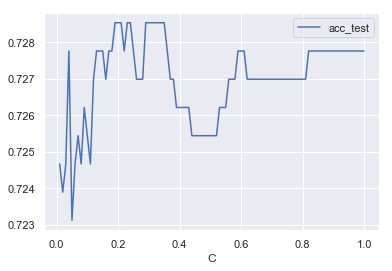

In [140]:
plot_df = df.drop(['coef_'], axis = 1)
plot_df.plot.line(x='C', y='acc_test')



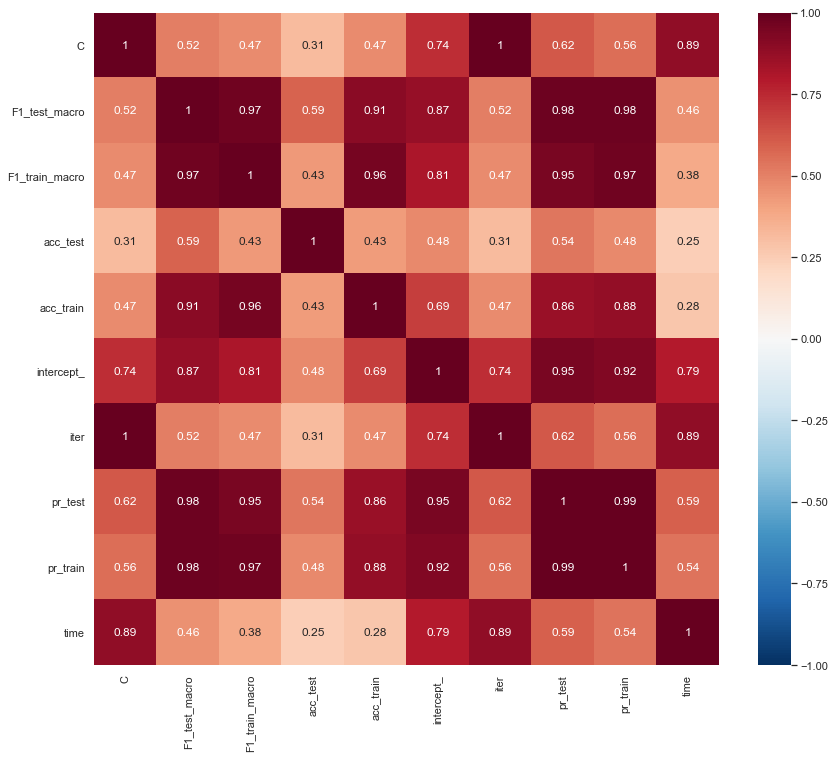

In [141]:
correlation = plot_df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

Podem veure que el valor C que ens indica en part la exactitud que volem tenir en el model
segons les dades existents, manté una gran correlació amb el paràmetre intercept, que 
indica quin és l'inici de la recta de regressió.
Podem veure que en el temps hi ha el màxim valor de correlació, ja que segons el paràmetre C
voldrem o no corregir algunes exactituds del dataset. També té un bon nivell de correlació
amb la precissió en les dades del test.

## B. Regularitzadors (40%)

* Descriu el parametre **penalty** de LogisticRegression {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}

* Hi ha alguna regularitzador que no està implementat en segons quin **solver**. Haureu de trobar la combinació que funciona.

* Què representen els atributs *coef_* i *intercept_*. Mostra'ls. Hi veus alguna diferencia depenen del regularitzador utilitzat?

* Què fa el parametre *C*. En quins casos afecta? Fes una taula mostrant els resultats.



intercept_ --> valor de la y en x=0

coef_ --> coeficients per la recta de regressió

C = 1/λ --> Com més gran sigui λ, menys probable és que els paràmetres augmentin de magnitud
simplement per ajustar les petites pertorbacions de les dades. Com més gran sigui C
més s'ajustarà a les dades del model, i si tenim poques dades pot provocar overfitting.

In [142]:
param = {}
param['1'] = {'penalty' : 'l1', 'solver' : 'saga'}
param['2'] = {'penalty' : 'l2', 'solver' : 'saga'}
param['3'] = {'penalty' : 'elasticnet', 'solver' : 'saga'}
param['4'] = {'penalty' : 'none', 'solver' : 'saga'}
param['5'] = {'penalty' : 'l1', 'solver' : 'liblinear'}
param['6'] = {'penalty' : 'l2', 'solver' : 'liblinear'}
print(param['6'])
rows_list = []
for name in range(1,7):
    """Utilitzem les convinacions de paràmetres que hem definit"""
    for i in range(1,101):
        """Variem paràmetres C i segons i/100 i guardem tots els resultats"""
        if param[str(name)]['penalty'] == 'elasticnet': 
            clf = LogisticRegression(random_state = 0,penalty = param[str(name)]['penalty'], 
                                     solver = param[str(name)]['solver'], 
                                     C = i/100, l1_ratio = 0.5)# model
        else:
            clf = LogisticRegression(random_state = 0,penalty = param[str(name)]['penalty'],
                                     solver = param[str(name)]['solver'], C = i/100)# model
        samples = 0.1  # utilitza valors com 0.01, 0.1 o 1, que hauran de equivaldre a 1%, 10%, 100%
        results = entrena_prediu_evalua(clf, samples, X_train, y_train, X_test, y_test)
        results['iter'] = i
        results['C'] = i/100
        results['penalty'] = param[str(name)]['penalty']
        results['solver'] = param[str(name)]['solver']
        rows_list.append(results)

df = pd.DataFrame(rows_list)

{'penalty': 'l2', 'solver': 'liblinear'}


/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: U

/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: Converg

/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: Converg

/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: U

/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: U

In [134]:
df[df.C == 0.1]


,C,F1_test_macro,F1_train_macro,acc_test,acc_train,coef_,intercept_,iter,penalty,pr_test,pr_train,solver,time
9,0.100,0.703,0.710,0.733,0.737,"[-0.020175927685919495, -0.5213486211219482, 0...",0.567,10,l1,0.778,0.773,saga,0.003
109,0.100,0.697,0.707,0.726,0.732,"[-0.14161374112538958, -0.5175298675721707, 0....",0.573,10,l2,0.776,0.774,saga,0.004
209,0.100,0.704,0.714,0.734,0.740,"[-0.10539098047030684, -0.546806581409067, 0.0...",0.568,10,elasticnet,0.780,0.777,saga,0.003
309,0.100,0.696,0.712,0.721,0.734,"[-0.2863072599341892, -0.6530413163021911, 0.0...",0.607,10,none,0.782,0.784,saga,0.010
409,0.100,0.712,0.719,0.735,0.739,"[-0.0223694866583102, -0.5310845537592706, 0.0...",0.458,10,l1,0.794,0.790,liblinear,0.002
509,0.100,0.701,0.709,0.728,0.731,"[-0.14440116160502575, -0.5219280748362697, 0....",0.514,10,l2,0.783,0.781,liblinear,0.002


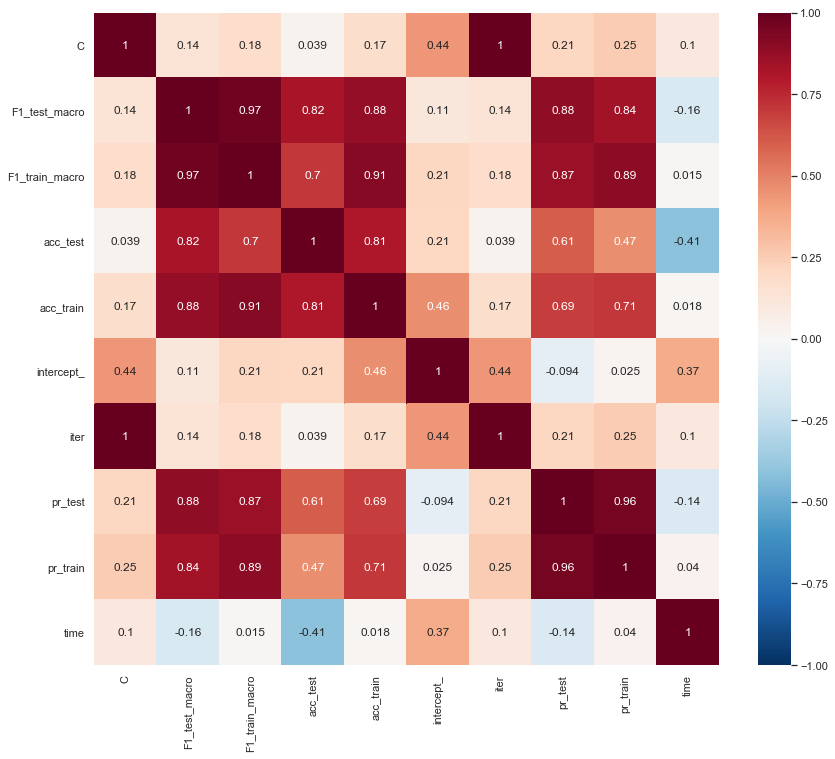

In [143]:
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

Podem veure que el valor C que ens indica en part la exactitud que volem tenir en el model
segons les dades existents, manté una gran correlació amb el paràmetre intercept, que 
indica quin és l'inici de la recta de regressió.
Podem veure que en el temps hi ha el màxim valor de correlació, ja que segons el paràmetre C
voldrem o no corregir algunes exactituds del dataset. També té un bon nivell de correlació
amb la precissió en les dades del test.

## C. Demostració Error de Bias (20%)

* Què hem de fer per veure que el model que estem provant té un error de bias molt alt? (es a dir, model simple)

* Què passa si fem servir poques dades per entrenar? (mostra com varien els resultats segons % de entrenament)

* I si utilitzem poques iteracions limitant el *max_iter*


In [22]:
""" erros de bias molt alt"""
samplepl = {}
samplepl['ac_test'] = []
samplepl['ac_train'] = []
iterpl = {}
iterpl['ac_test'] = []
iterpl['ac_train'] = []


for i in range(1,101):
    clf = LogisticRegression(random_state = 0, penalty = 'l1', solver = 'saga', C = 0.1) # model
    results = entrena_prediu_evalua(clf, i/100, X_train, y_train, X_test, y_test)
    samplepl['ac_test'].append(results['acc_test'])
    samplepl['ac_train'].append(results['acc_train'])
    
for i in range(1,101):
    clf = LogisticRegression(random_state = 0, penalty = 'l1', solver = 'saga', C = 0.1, max_iter=i) # model
    results = entrena_prediu_evalua(clf, 1, X_train, y_train, X_test, y_test)
    iterpl['ac_test'].append(results['acc_test'])
    iterpl['ac_train'].append(results['acc_train'])



LogisticRegression s'ha entrenat amb el 1.0% de mostres.
LogisticRegression s'ha entrenat amb el 2.0% de mostres.
LogisticRegression s'ha entrenat amb el 3.0% de mostres.
LogisticRegression s'ha entrenat amb el 4.0% de mostres.
LogisticRegression s'ha entrenat amb el 5.0% de mostres.
LogisticRegression s'ha entrenat amb el 6.0% de mostres.
LogisticRegression s'ha entrenat amb el 7.000000000000001% de mostres.
LogisticRegression s'ha entrenat amb el 8.0% de mostres.
LogisticRegression s'ha entrenat amb el 9.0% de mostres.
LogisticRegression s'ha entrenat amb el 10.0% de mostres.
LogisticRegression s'ha entrenat amb el 11.0% de mostres.
LogisticRegression s'ha entrenat amb el 12.0% de mostres.
LogisticRegression s'ha entrenat amb el 13.0% de mostres.
LogisticRegression s'ha entrenat amb el 14.000000000000002% de mostres.
LogisticRegression s'ha entrenat amb el 15.0% de mostres.
LogisticRegression s'ha entrenat amb el 16.0% de mostres.
LogisticRegression s'ha entrenat amb el 17.0% de most

/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: T

LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.


/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: T

LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.


/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrena

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'Samples % ')]

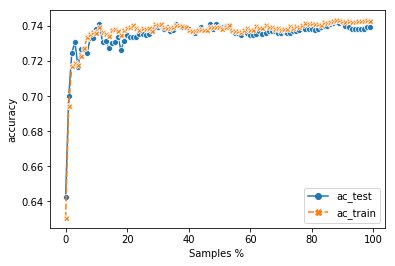

In [19]:
info = pd.DataFrame(samplepl)
ax = sns.lineplot(data=info, markers=True)
ax.set(xlabel="Samples % ", ylabel="accuracy")


En aquesta gràfica podem veure que no hi ha gaire variança en el model, pel que no ens trobem en un cas de 
overfitting. Del contrari tenim una precissió del 74% aprox, pel que segurament ens trobem en un cas de 
underfitting, on el model encara pot millorar ja sigui rebent més dades o afegint polinomis.

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'Max Iterations ')]

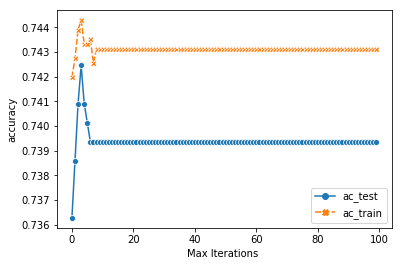

In [21]:
info = pd.DataFrame(iterpl)
ax = sns.lineplot(data=info, markers=True)
ax.set(xlabel="Max Iterations ", ylabel="accuracy")



Aquesta gràfica ens confirma que el model ja no pot millorar més tal com està muntat, és a dir, les iteracions
no són un problema per a buscar una millor solució, necessitem canviar de model.

## D. Demostració Error de Variance (20%)

* Què hem de fer per veure que el model que estem provant té un error de variança molt alt? (es a dir, model massa complexe)

* Crea models de features més complexes amb [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

* Podem reduir el error de variança si enlloc de classificar el vi blanc i el negre, els separessim?

* Sabrieu explicar-me aquesta [gráfica](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)? Podeu generar-la amb aquestes dades de entrenament?



[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'Samples % ')]

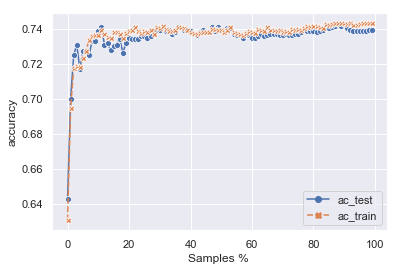

In [153]:
info = pd.DataFrame(samplepl)
ax = sns.lineplot(data=info, markers=True)
ax.set(xlabel="Samples % ", ylabel="accuracy")



Tenim poca variança en el model, no hi ha overfitting.

In [156]:
degreepl = {}
degreepl['ac_test'] = []
degreepl['ac_train'] = []
degreepl['degree'] = []

for i in range (1,6):
    numerical_preprocess = Pipeline([
    ( 'poly', PolynomialFeatures(degree=i, include_bias=False) ),
    ( 'std_scaler', StandardScaler() )
    ])

    full_pipeline = Pipeline([
        ("preprocess", numerical_preprocess),
        ('LR', LogisticRegression(fit_intercept=True))
    ])
    full_pipeline.fit(X_train, y_train)
    degreepl['ac_train'].append(full_pipeline.score(X_train, y_train))
    degreepl['ac_test'].append(full_pipeline.score(X_test, y_test))
    degreepl['degree'].append(i)


/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'Degree ')]

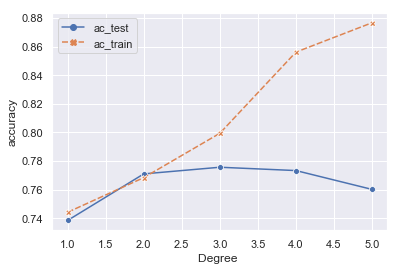

In [159]:
info = pd.DataFrame(degreepl)
new = info.set_index('degree')
ax = sns.lineplot(data=new, markers=True)
ax.set(xlabel="Degree ", ylabel="accuracy")

La millor solució per aquest problema seria resoldre-ho amb el polinomi de grau 3, ja que tindriem el punt de
màxima accuracy en les dades del test. Podem veure que afegint més graus al polinomi millorem els resultats en 
les dades de train, però perdem eficaçia en el test, tenim overfitting.

In [161]:
red_df    = dataset[dataset['is_red_wine']==1]
no_red_df  = dataset[dataset['is_red_wine']==0]


red_df['quality_categorical'] = pd.cut(red_df['quality'], bins=bins, labels=quality_labels, include_lowest=True)
rw_quality =red_df['quality_categorical']
rw_data = red_df.drop(['is_red_wine', 'type', 'quality', 'quality_categorical'], axis = 1)

rw_array = StandardScaler().fit_transform(rw_data)
X_train, X_test, y_train, y_test = train_test_split(rw_array, 
                                                    rw_quality, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
clf = LogisticRegression(random_state = 0, penalty = 'l1', solver = 'saga', C = 0.1) # model
results = entrena_prediu_evalua(clf, 1, X_train, y_train, X_test, y_test)
print("Coef -->"+str(results['coef_']) +"\nIntercept  -->"+str(results['intercept_'])+"\nAcc  -->"+str(results['acc_test']))


degreeplr = {}
degreeplr['ac_test'] = []
degreeplr['ac_train'] = []
degreeplr['degree'] = []

for i in range (1,6):
    numerical_preprocess = Pipeline([
    ( 'poly', PolynomialFeatures(degree=i, include_bias=False) ),
    ( 'std_scaler', StandardScaler() )
    ])

    full_pipeline = Pipeline([
        ("preprocess", numerical_preprocess),
        ('LR', LogisticRegression(fit_intercept=True))
    ])
    full_pipeline.fit(X_train, y_train)
    degreeplr['ac_train'].append(full_pipeline.score(X_train, y_train))
    degreeplr['ac_test'].append(full_pipeline.score(X_test, y_test))
    degreeplr['degree'].append(i)

/Users/puche99/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceW

Coef -->[ 0.         -0.51104109 -0.0585611   0.         -0.16636465  0.05290757
 -0.42416313  0.         -0.03799515  0.402806    0.88103128]
Intercept  -->0.23903482561572967
Acc  -->0.7366771159874608


/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'Degree ')]

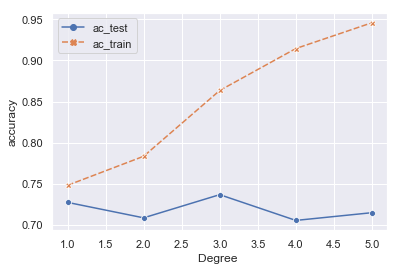

In [162]:
info = pd.DataFrame(degreeplr)
new = info.set_index('degree')
ax = sns.lineplot(data=new, markers=True)
ax.set(xlabel="Degree ", ylabel="accuracy")

In [163]:
no_red_df['quality_categorical'] = pd.cut(no_red_df['quality'], bins=bins, labels=quality_labels, include_lowest=True)
nrw_quality = no_red_df['quality_categorical']
nrw_data = no_red_df.drop(['is_red_wine', 'type', 'quality', 'quality_categorical'], axis = 1)

nrw_array = StandardScaler().fit_transform(nrw_data)
X_train, X_test, y_train, y_test = train_test_split(nrw_array, 
                                                    nrw_quality, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
clf = LogisticRegression(random_state = 0, penalty = 'l1', solver = 'saga', C = 0.1) # model
samples = 1  # utilitza valors com 0.01, 0.1 o 1, que hauran de equivaldre a 1%, 10%, 100%
results = entrena_prediu_evalua(clf, samples, X_train, y_train, X_test, y_test)
print("Coef -->"+str(results['coef_']) +"\nIntercept  -->"+str(results['intercept_'])+"\nAcc  -->"+str(results['acc_test']))

degreeplnr = {}
degreeplnr['ac_test'] = []
degreeplnr['ac_train'] = []
degreeplnr['degree'] = []

for i in range (1,6):
    numerical_preprocess = Pipeline([
    ( 'poly', PolynomialFeatures(degree=i, include_bias=False) ),
    ( 'std_scaler', StandardScaler() )
    ])

    full_pipeline = Pipeline([
        ("preprocess", numerical_preprocess),
        ('LR', LogisticRegression(fit_intercept=True))
    ])
    full_pipeline.fit(X_train, y_train)
    degreeplnr['ac_train'].append(full_pipeline.score(X_train, y_train))
    degreeplnr['ac_test'].append(full_pipeline.score(X_test, y_test))
    degreeplnr['degree'].append(i)

/Users/puche99/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Coef -->[-0.03837828 -0.65103863 -0.0014913   0.57220941  0.01298138  0.14201854
  0.         -0.33800845  0.08167965  0.16488344  1.14369532]
Intercept  -->0.8903717807835213
Acc  -->0.7772073921971252


/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'Degree ')]

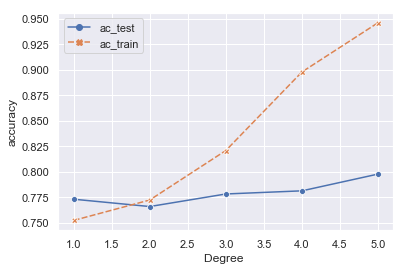

In [164]:
info = pd.DataFrame(degreeplnr)
new = info.set_index('degree')
ax = sns.lineplot(data=new, markers=True)
ax.set(xlabel="Degree ", ylabel="accuracy")

Separant els dos datasets no veiem cap millora, ja que el vi blanc manté una accuracy del 78%, però el vi vermell
funciona molt pitjor per separat.

In [189]:
from sklearn import linear_model


import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    clf = LogisticRegression(random_state = 0, penalty = 'l2', solver = 'saga', C = a) # model
    results = entrena_prediu_evalua(clf, 1, X_train, y_train, X_test, y_test)
    coefs.append(results['coef_'])

/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: T

/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/puche99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: T

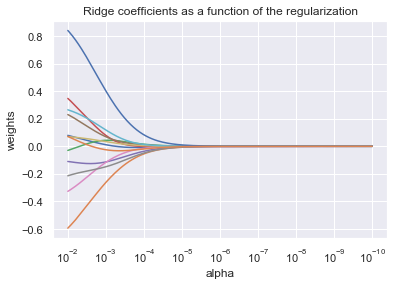

In [190]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Com que el paràmetre C és inversament proporcional a alpha, obtenim la gràfica inversa a la del exemple, és a dir,
a més petit alpha totes les variables tendeixen al mateix valor. Cada color representa una característica diferent 
del vector de coeficient i ens indica el soroll que podem obtenir en el model, a més soroll en una característica farà que el model no convergeixi.